In [146]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sympy as sym
import pandas as pd

In [147]:
t_detect = [5.1,9.9,14.5,20,19]
t_osc =  [4.9,10.2,15.1,21.2,25]

plt.scatter(t_osc, t_detect)
plt.xlabel("Tiempo medido por el oscilador (μs)")
plt.ylabel("Tiempo medido por el software (μs)")
plt.grid(which = "major")

In [148]:
def expfunction(x,A,B,C):
    return A*np.exp(-x*B)+C

def expfunction2(x,A,B):
    return A*np.exp(-x*B)

def linearfunction(x,A,B):
    return A*x + B

In [149]:
DataFrame1 = pd.read_csv('24-10-15-11-21.data', usecols=[0], names=['time_rawdata'], sep=' ')
DataFrame1 = DataFrame1[DataFrame1['time_rawdata'] < 20000]

DataFrame2 = pd.read_csv('24-10-18-17-18.data', usecols=[0], names=['time_rawdata'], sep=' ')
DataFrame2 = DataFrame2[DataFrame2['time_rawdata'] < 20000]


In [150]:
times_rawdata1 = DataFrame1['time_rawdata']/1000
times_rawdata2 = DataFrame2['time_rawdata']/1000
times_rawdata3 = DataFrame3["time_rawdata"]/1000

In [151]:
len(times_rawdata1), len(times_rawdata2), len(times_rawdata3)

(2066, 9225, 228013)

<IPython.core.display.Javascript object>


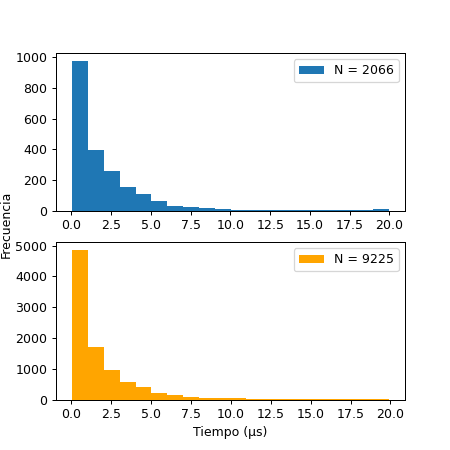

In [152]:
fig, ax = plt.subplots(2,1, figsize=(5,5))

ax[0].hist(times_rawdata1, bins=20,label="N = 2066")
ax[1].hist(times_rawdata2, bins=20,label="N = 9225", color="orange")
#plt.ylabel("Frecuencia")
plt.xlabel("Tiempo (μs)")
ax[0].legend()
ax[1].legend()
fig.text(0.0001, 0.5, 'Frecuencia', va='center', rotation='vertical')
plt.show()


In [103]:
F1, N1 = np.histogram(times_rawdata1, bins=20)

C:\Users\Acer\AppData\Local\Temp\ipykernel_19508\1277222602.py:2: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-x*B)+C


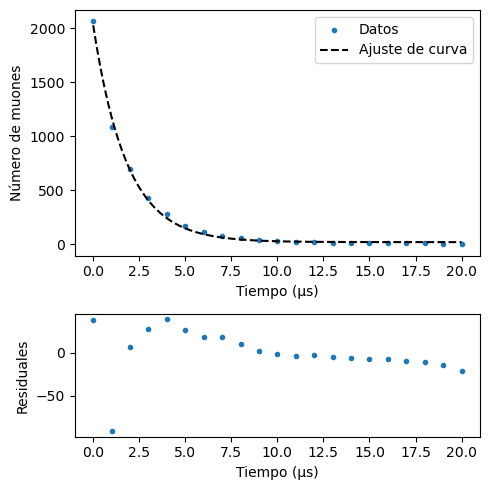

In [104]:
fig, ax = plt.subplots(2,1, figsize=(5,5),gridspec_kw={'height_ratios': [2, 1]})

time_fit1 = np.linspace(0,20,21)
time_graph1 = np.linspace(0,20,100)
muon_graph1 = np.array([len(times_rawdata1)]) 

for i in range(0, len(F1)):
    muon_graph1 = np.append(muon_graph1, muon_graph1[i] - F1[i])
    
params1, pcov1 = scipy.optimize.curve_fit(expfunction, time_fit1, muon_graph1)

residuals1 = muon_graph1 - expfunction(time_fit1,*params1)
    
ax[0].scatter(time_fit1,muon_graph1,label="Datos",marker=".")
ax[0].plot(time_graph1, expfunction(time_graph1,*params1),linestyle="--",label="Ajuste de curva",color="k")
ax[0].set_xlabel("Tiempo (μs)")
ax[0].set_ylabel("Número de muones")
ax[0].legend()

ax[1].scatter(time_fit1, residuals1, marker=".")
ax[1].set_ylabel("Residuales")
ax[1].set_xlabel("Tiempo (μs)")
plt.tight_layout()

plt.show()

In [107]:
F2, N2 = np.histogram(times_rawdata2, bins=20)
F2,N2

(array([4876, 1693,  957,  581,  393,  221,  160,   97,   65,   48,   35,
          24,   16,   14,    9,   11,    7,    9,    5,    4], dtype=int64),
 array([ 0.04 ,  1.034,  2.028,  3.022,  4.016,  5.01 ,  6.004,  6.998,
         7.992,  8.986,  9.98 , 10.974, 11.968, 12.962, 13.956, 14.95 ,
        15.944, 16.938, 17.932, 18.926, 19.92 ]))

C:\Users\Acer\AppData\Local\Temp\ipykernel_19508\1277222602.py:2: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-x*B)+C


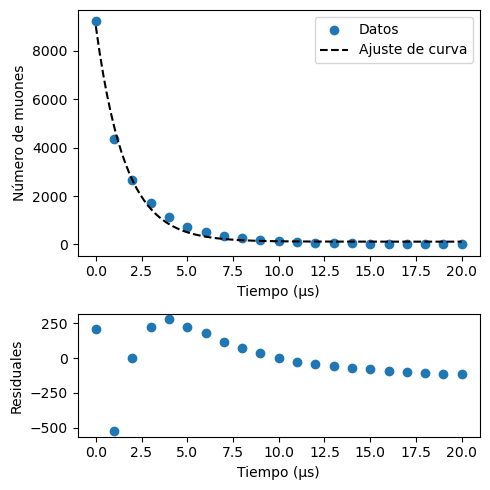

In [114]:
fig, ax = plt.subplots(2,1, figsize=(5,5),gridspec_kw={'height_ratios': [2, 1]})

time_fit2 = np.linspace(0,20,21)
time_graph2 = np.linspace(0,20,100)
muon_graph2 = np.array([len(times_rawdata2)])

for i in range(0, len(F2)):
    muon_graph2 = np.append(muon_graph2, muon_graph2[i] - F2[i]) #remaining particles
    
params2, pcov2 = scipy.optimize.curve_fit(expfunction, time_fit2, muon_graph2)

residuals2 = muon_graph2 - expfunction(time_fit2,*params2)
    
ax[0].scatter(time_fit2,muon_graph2,label="Datos",marker="o")
ax[0].plot(time_graph2, expfunction(time_graph2,*params2),linestyle="--",label="Ajuste de curva",color="k")
ax[0].set_xlabel("Tiempo (μs)")
ax[0].set_ylabel("Número de muones")
ax[0].legend()

ax[1].scatter(time_fit2, residuals2, marker="o")
ax[1].set_ylabel("Residuales")
ax[1].set_xlabel("Tiempo (μs)")
plt.tight_layout()

plt.show()

In [111]:
params2, np.sqrt(np.diag(pcov2))

(array([8.90154780e+03, 6.26776854e-01, 1.16106570e+02]),
 array([1.81167424e+02, 2.61089978e-02, 4.88622404e+01]))

In [112]:
params22, pcov22 = scipy.optimize.curve_fit(expfunction2, time_fit2, muon_graph2)
params22, np.sqrt(np.diag(pcov22))

C:\Users\Acer\AppData\Local\Temp\ipykernel_19508\1277222602.py:5: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-x*B)


(array([8.96727739e+03, 5.96366168e-01]),
 array([1.96137755e+02, 2.42299332e-02]))

In [117]:
muon_graph2_corrected = muon_graph2 - params2[2]
params23, pcov23 = scipy.optimize.curve_fit(expfunction, time_fit2, muon_graph2_corrected)
params23, np.sqrt(np.diag(pcov23))

C:\Users\Acer\AppData\Local\Temp\ipykernel_19508\1277222602.py:2: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-x*B)+C


(array([8.90155342e+03, 6.26777206e-01, 1.28476449e-03]),
 array([1.81559692e+02, 2.60393256e-02, 4.88107163e+01]))

In [118]:
muon_graph2[:-1]

array([9225, 4349, 2656, 1699, 1118,  725,  504,  344,  247,  182,  134,
         99,   75,   59,   45,   36,   25,   18,    9,    4], dtype=int64)

In [119]:
params24, pcov24 = scipy.optimize.curve_fit(linearfunction, time_fit2[:-1], np.log(muon_graph2[:-1]))
params24, np.sqrt(np.diag(pcov24))

(array([-0.35371463,  8.56942697]), array([0.01003749, 0.11154722]))

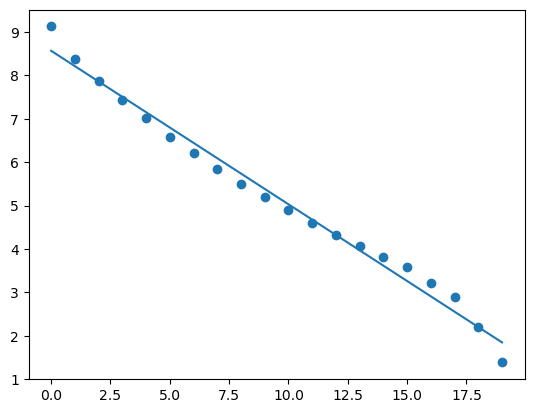

In [120]:
plt.scatter(time_fit2[:-1], np.log(muon_graph2[:-1]))
plt.plot(time_fit2[:-1], linearfunction(time_fit2[:-1],*params24))

In [121]:
1/5.35209596e-01

1.8684268882204422

In [122]:
tau_obs = 1/5e-1
tau_obs

2.0

In [123]:
1e-2/(5e-1)**2

0.04

In [124]:
muon_graph1_corrected = muon_graph1 - params1[2]

In [125]:
muon_graph1_corrected

array([ 2.04434383e+03,  1.06534383e+03,  6.72343833e+02,  4.11343833e+02,
        2.59343833e+02,  1.53343833e+02,  9.13438329e+01,  6.03438329e+01,
        3.43438329e+01,  1.63438329e+01,  6.34383294e+00,  3.43832944e-01,
       -6.56167056e-01, -3.65616706e+00, -5.65616706e+00, -6.65616706e+00,
       -7.65616706e+00, -9.65616706e+00, -1.06561671e+01, -1.46561671e+01,
       -2.16561671e+01])

In [126]:
params12, pcov12 = scipy.optimize.curve_fit(expfunction2, time_fit1, muon_graph1)

C:\Users\Acer\AppData\Local\Temp\ipykernel_19508\1277222602.py:5: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-x*B)


In [127]:
params12, np.sqrt(np.diag(pcov12))

(array([2.01882851e+03, 5.30174265e-01]),
 array([3.09114588e+01, 1.46571581e-02]))

In [129]:
1/5.30174265e-1

1.8861722758270811

In [358]:
0.009/(4.84e-01)**2

0.038419506864285226

In [343]:
rho,tau_plus,tau_minus = sym.symbols("rho,tau_plus,tau_minus",real=True)
#tau_plus = 2.1969
#tau_minus = 2.043
eq = sym.Eq(tau_obs, (1+rho)*tau_minus*tau_plus/(rho*tau_minus + tau_plus))

In [344]:
sym.solve(eq,rho)

[tau_plus*(2.0 - tau_minus)/(tau_minus*(tau_plus - 2.0))]

In [340]:
hbarra = 6.582119569e-25 #GeV
m = 0.10566 #GeV

In [341]:
np.sqrt(192*np.pi**3*hbarra/(m**5*tau_obs*1e-6))

1.2197386717994762e-05

In [354]:
sigma_fermi = np.sqrt(192*np.pi**3*hbarra/(m**5)) * (0.04*1e-6) *np.sqrt(1/(tau_obs*1e-6)**3)/2
sigma_fermi

1.2197386717994762e-07

In [365]:
np.sqrt(192*np.pi**3*hbarra/(m**5*2.07*1e-6))

1.1989377051192723e-05

In [359]:
np.sqrt(192*np.pi**3*hbarra/(m**5)) * (0.04*1e-6) *np.sqrt(1/(2.07*1e-6)**3)/2

1.1583939179896353e-07